Dataset:

The sales dataset has following variables:

-> TV (advertisement spending on TV)

-> Radio (advertisement spending on Radio)

-> Newspaper (advertisement spending on Newspaper)

-> Sales (Sales after advertisement spending)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
data = pd.read_csv("C:/Users/all/Downloads/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


EDA

In [59]:
df = data.copy()

In [60]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [61]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)    
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [62]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [63]:
# Checking data types and general info
print("\nData types and info:\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Data types and info:
 None


In [64]:

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [65]:
df.isnull().sum() #finding null values


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

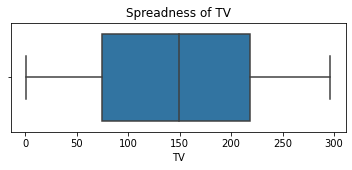

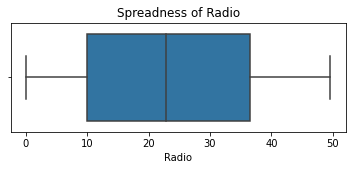

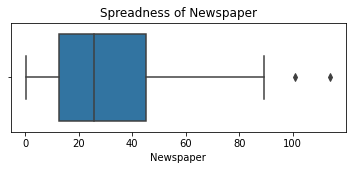

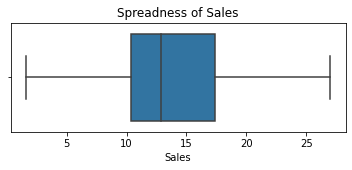

In [66]:
for col in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=col, data=df)
    plt.title(f'Spreadness of {col}')
    plt.show()

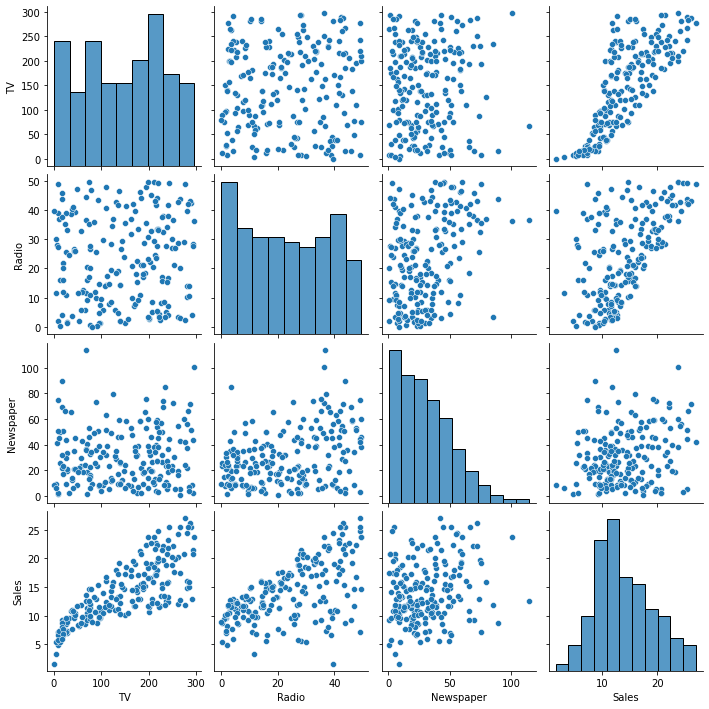

In [67]:
sns.pairplot(df)
plt.show()

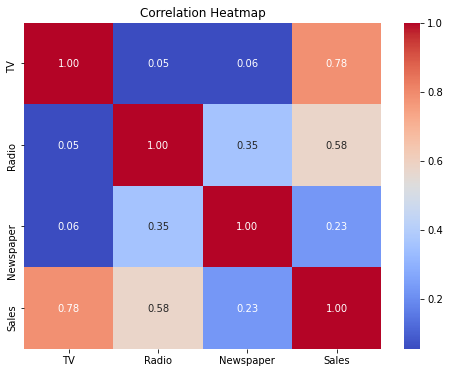

In [68]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

KPI's

1. Return on Investment (ROI) for each medium:
    
The ROI for each medium is calculated by dividing the 'Sales' by the amount spent on each advertising medium (TV, Radio, Newspaper). The values represent how much in sales revenue is generated for every unit of currency spent on advertising.

In [71]:
# Calculating ROI for each medium
df['ROI_TV'] = df['Sales'] / df['TV']
df['ROI_Radio'] = df['Sales'] / df['Radio']
df['ROI_Newspaper'] = df['Sales'] / df['Newspaper']

In [72]:
# Viewing the ROI for each medium
print(df[['ROI_TV', 'ROI_Radio', 'ROI_Newspaper']])

       ROI_TV  ROI_Radio  ROI_Newspaper
0    0.096045   0.584656       0.319364
1    0.233708   0.264631       0.230599
2    0.540698   0.202614       0.134199
3    0.122112   0.447942       0.316239
4    0.071350   1.194444       0.220890
..        ...        ...            ...
195  0.198953   2.054054       0.550725
196  0.102972   1.979592       1.197531
197  0.072316   1.376344       2.000000
198  0.089915   0.607143       0.385196
199  0.057734   1.558140       1.540230

[200 rows x 3 columns]


Insights:
    
ROI_TV: For each dollar spent on TV advertising, approximately 9.6 cents in sales are generated.

ROI_Radio: Radio advertising generates approximately 58.5 cents in sales for every dollar spent.

ROI_Newspaper: Newspaper advertising generates around 31.9 cents in sales for every dollar spent.


2. Attribution Modeling:

The coefficients obtained from the multiple linear regression model represent the estimated impact of each advertising medium on sales, holding other variables constant.



In [73]:
from sklearn.linear_model import LinearRegression

# Considering TV, Radio, and Newspaper as predictors
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Printing the coefficients (attribution)
print("TV coefficient:", model.coef_[0])
print("Radio coefficient:", model.coef_[1])
print("Newspaper coefficient:", model.coef_[2])


TV coefficient: 0.0457646454553976
Radio coefficient: 0.18853001691820453
Newspaper coefficient: -0.0010374930424762834


Insights:

TV coefficient: Each unit increase in TV advertising spending results in an estimated increase of approximately 0.046 units in sales.

Radio coefficient: Similarly, each unit increase in Radio advertising spending results in an estimated increase of around 0.189 units in sales.

Newspaper coefficient: Interestingly, an increase in Newspaper advertising spending results in a minimal decrease (approximately -0.001 units) in sales, suggesting it might not significantly contribute or may even have a negative impact.


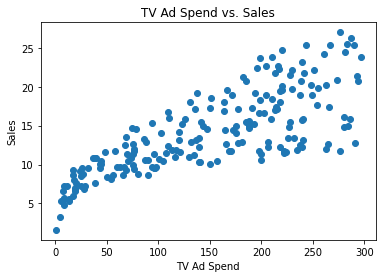

In [30]:

# Scatter plot for TV ad spend vs. sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.title('TV Ad Spend vs. Sales')
plt.show()

# Similar scatter plots can be created for Radio and Newspaper ad spend


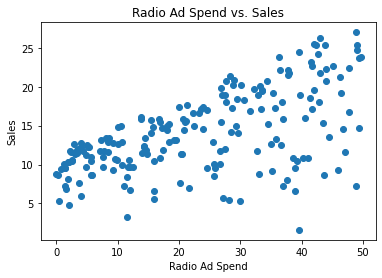

In [34]:

# Scatter plot for Radio ad spend vs. sales
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Ad Spend')
plt.ylabel('Sales')
plt.title('Radio Ad Spend vs. Sales')
plt.show()


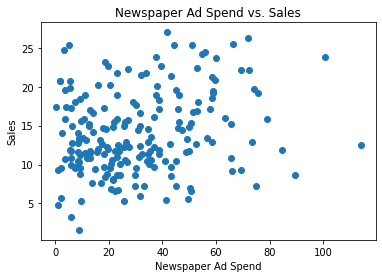

In [35]:

# Scatter plot for Newspaper ad spend vs. sales
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Ad Spend')
plt.ylabel('Sales')
plt.title('Newspaper Ad Spend vs. Sales')
plt.show()

# Similar scatter plots can be created for Radio and Newspaper ad spend


3. Customer Segmentation:

The data is segmented into two groups based on high and low TV, Newspaper and Radio ad spend.

In [77]:
# Example: Create two segments based on high and low TV ad spend
high_spend = df[df['TV'] > df['TV'].mean()]
low_spend = df[df['TV'] <= df['TV'].mean()]

# Analyze sales for these segments
print("High TV spend segment:")
print(high_spend['Sales'].describe())
print()
print("Low TV spend segment:")
print(low_spend['Sales'].describe())


High TV spend segment:
count    102.000000
mean      17.476471
std        4.371401
min       10.100000
25%       13.575000
50%       17.200000
75%       20.700000
max       27.000000
Name: Sales, dtype: float64

Low TV spend segment:
count    98.000000
mean     10.427551
std       3.216830
min       1.600000
25%       8.625000
50%      10.350000
75%      12.150000
max      19.200000
Name: Sales, dtype: float64


In [78]:
# Example: Create two segments based on high and low Radio ad spend
high_spend = df[df['Radio'] > df['Radio'].mean()]
low_spend = df[df['Radio'] <= df['Radio'].mean()]

# Analyze sales for these segments
print("High Radio spend segment:")
print(high_spend['Sales'].describe())
print()
print("Low Radio spend segment:")
print(low_spend['Sales'].describe())


High Radio spend segment:
count    100.00000
mean      16.60500
std        5.70717
min        1.60000
25%       11.95000
50%       17.30000
75%       20.72500
max       27.00000
Name: Sales, dtype: float64

Low Radio spend segment:
count    100.000000
mean      11.440000
std        2.945087
min        3.200000
25%        9.700000
50%       11.600000
75%       13.200000
max       17.600000
Name: Sales, dtype: float64


In [79]:
# Example: Create two segments based on high and low Newspaper ad spend
high_spend = df[df['Newspaper'] > df['Newspaper'].mean()]
low_spend = df[df['Newspaper'] <= df['Newspaper'].mean()]

# Analyze sales for these segments
print("High Newspaper spend segment:")
print(high_spend['Sales'].describe())
print()
print("Low Newspaper spend segment:")
print(low_spend['Sales'].describe())


High Newspaper spend segment:
count    88.000000
mean     15.392045
std       5.549634
min       5.500000
25%      11.375000
50%      14.750000
75%      19.450000
max      27.000000
Name: Sales, dtype: float64

Low Newspaper spend segment:
count    112.000000
mean      12.946429
std        4.691317
min        1.600000
25%        9.700000
50%       12.000000
75%       15.750000
max       25.400000
Name: Sales, dtype: float64


# Interpretation